**INTRODUCTION**

For this project, I'll be working with "Womart," leading nutrition and supplement retail chain that offers a comprehensive range of products for wellness and fitness needs.

The purpose of this notebook will be to predict the number of sales for each store to provide the stores with essential insights into the upcoming inventory and cash flow for the following months.

The dataset that they provided contains the information of sales of the past 18 months along with:

ID: Unique identifier for a row

Store id: Unique id for 

Store type: Type of the store

Location type: Type of the location where the store is located

Region Code: Code of the region where the store is located

Date: Information about the date

Holiday: If there is a holiday on the given date

Discount: If the store offers a discount on the given dateeach store

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data=pd.read_csv('TRAIN.csv')
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
test_data=pd.read_csv('TEST_FINAL.csv')
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
#Checking null values
train_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [5]:
test_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

# Data Preprocessing

In [6]:
#Rename Values
train_data['Discount']=train_data['Discount'].map({'Yes':1,'No':0})

In [7]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52


In [8]:
#Checking data type of each columns
train_data.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount           int64
#Order             int64
Sales            float64
dtype: object

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  int64  
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 14.4+ MB


In [10]:
train_data.describe()

,Store_id,Holiday,Discount,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,0.447536,68.205692,42784.327982
std,105.366308,0.338256,0.497241,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,1.000000,82.000000,51909.000000
max,365.000000,1.000000,1.000000,371.000000,247215.000000


In [11]:
#Changing data type of Store_id,Holiday and Discount to object
train_data[['Store_id','Holiday','Discount']]=train_data[['Store_id','Holiday','Discount']].astype(object)

In [12]:
train_data['Date']=pd.to_datetime(train_data.Date)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  object        
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  object        
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 14.4+ MB


In [14]:
# Do we have duplicates?
print('Number of duplicates:', len(train_data[train_data.duplicated()]))

# Do we have missing values?
print('Number of missing values:', train_data.isnull().sum().sum())

Number of duplicates: 0
Number of missing values: 0


# EDA

In [15]:
# Which are the best stores (by number of sells)?
best_stores = train_data.groupby(['Store_id'], as_index=False)['Sales'].sum()        # sum sales from same store
best_stores = best_stores.sort_values('Sales', ascending = False)                # sort data
best_stores = best_stores.head(20)                                               # select top 20
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

C:\Users\Soham Lad\AppData\Local\Temp\ipykernel_21424\3451718849.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Store_id",y="Sales",data=best_stores,palette="viridis")


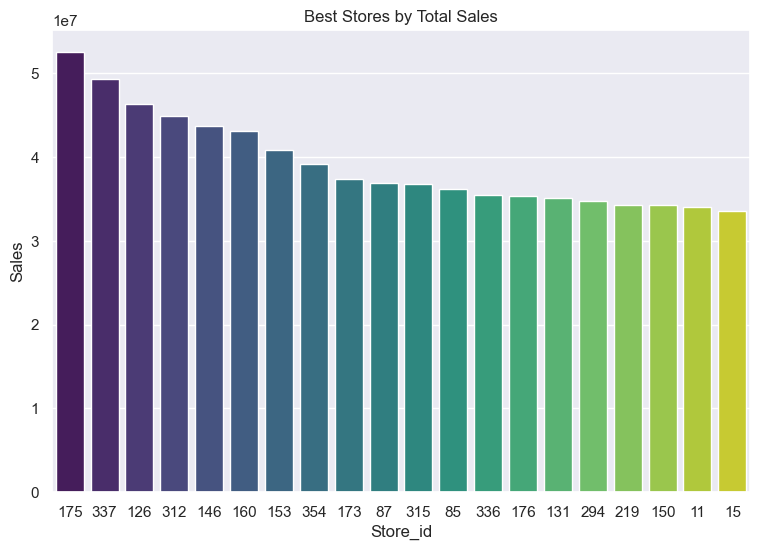

In [16]:
#Best Stores according to sells

best_stores=train_data.groupby(['Store_id'],as_index=False)['Sales'].sum()

#Sorting data
best_stores=best_stores.sort_values('Sales',ascending=False)
best_stores = best_stores.head(20)
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

sns.set()
# Visualization
fig = plt.subplots(figsize =(9, 6))
sns.barplot(x="Store_id",y="Sales",data=best_stores,palette="viridis")
plt.title("Best Stores by Total Sales")

plt.show()

Stores with id 175,337 and 126 have the most sales

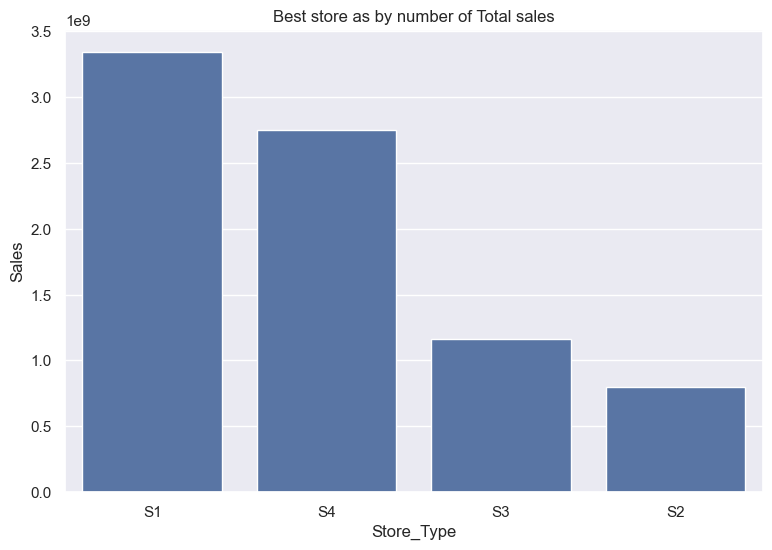

In [17]:
#Best store as by number of sales
best_store_type = train_data.groupby(['Store_Type'], as_index=False)['Sales'].sum()    
best_store_type = best_store_type.sort_values('Sales', ascending = False)                  
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)

fig=plt.subplots(figsize=(9,6))
sns.barplot(x="Store_Type",y="Sales",data=best_store_type)
plt.title("Best store as by number of Total sales")
plt.show()

Store 1 is best in terms of sales

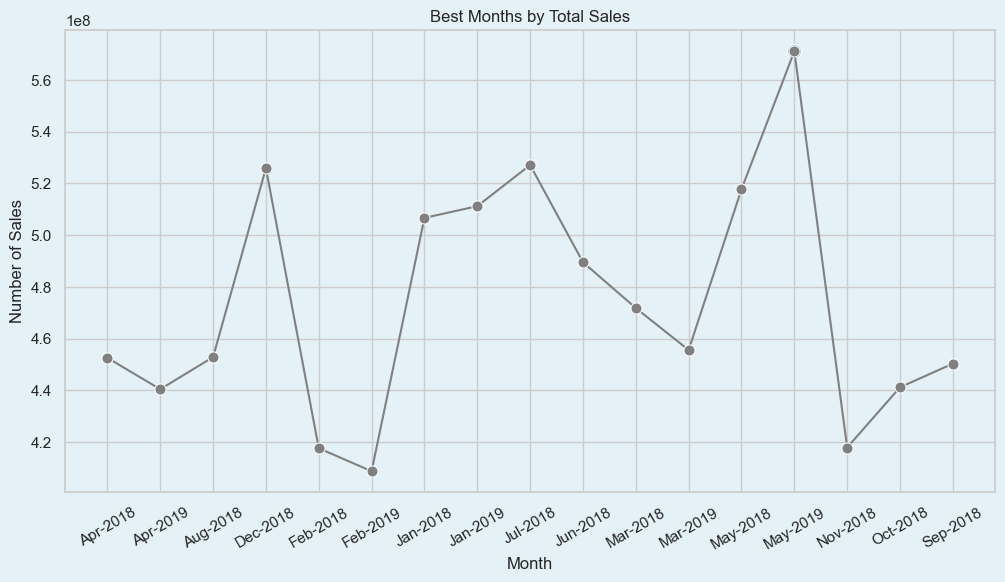

In [18]:
# Best month on basis of total sales
best_month = train_data.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

sns.set(style="whitegrid")

# Identify the best month
best_month_1 = best_month.sort_values('Sales', ascending=False).head(1)

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#e4f2f8')  # Set figure background color
ax.patch.set_facecolor('#e4f2f7')   # Set axes background color

sns.lineplot(x='Month', y='Sales', data=best_month, marker='o', markersize=8, color='grey')
sns.scatterplot(x=best_month_1['Month'], y=best_month_1['Sales'], color='#5495c9', s=100)


plt.xticks(rotation=30)
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Best Months by Total Sales')

plt.show()


People seems to buy more products during month Of May and December

C:\Users\Soham Lad\AppData\Local\Temp\ipykernel_21424\3517010199.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location_Type',y='Sales',data=best_location,palette="Greens")


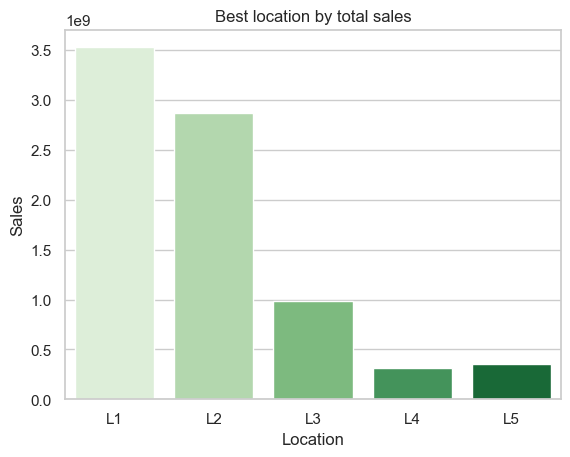

In [19]:
#the best locations by number of sales
best_location= train_data.groupby(['Location_Type'],as_index=False)['Sales'].sum()
best_location['Location_Type'] = best_location['Location_Type'].astype(str)

sns.barplot(x='Location_Type',y='Sales',data=best_location,palette="Greens")

plt.xlabel('Location')
plt.ylabel('Sales')
plt.title("Best location by total sales")
plt.show()

Location L1 and L2 have most sales

C:\Users\Soham Lad\AppData\Local\Temp\ipykernel_21424\3051939303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region_Code',y='Sales',data=best_region,palette="Reds")


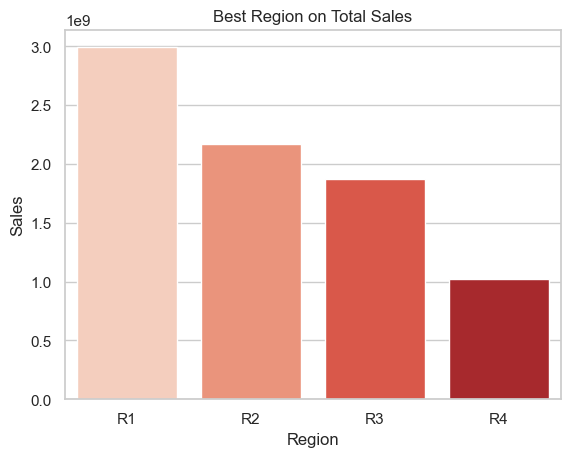

In [20]:
#Best region on Sales
best_region=train_data.groupby(['Region_Code'],as_index=False)['Sales'].sum()
best_region['Region_Code']=best_region['Region_Code'].astype(str)

sns.barplot(x='Region_Code',y='Sales',data=best_region,palette="Reds")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Best Region on Total Sales")
plt.show()

Region 1 is having the maximum sales

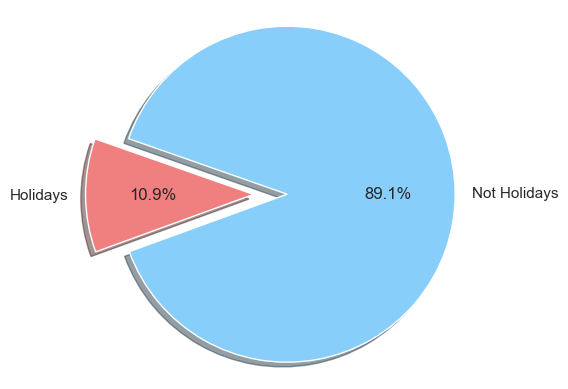

In [21]:
# Holidays Distribution
holiday = train_data.groupby(['Holiday'], as_index=False)['Sales'].sum()    
holiday['Holiday'] = holiday['Holiday'].astype(str)

plt.pie(holiday['Sales'], 
        explode=(0.2, 0), 
        labels=['Not Holidays', 'Holidays'], 
        colors= ['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=200)
        
plt.axis('equal')
plt.show()

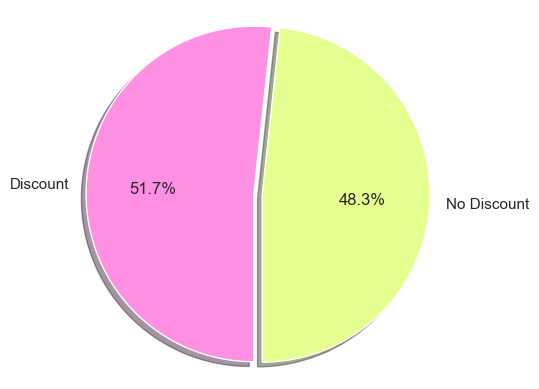

In [22]:
# Discount distribution
discount = train_data.groupby(['Discount'], as_index=False)['Sales'].sum()    
discount['Discount'] = discount['Discount'].astype(str)

plt.pie(discount['Sales'], 
        labels=['No Discount', 'Discount'], 
        explode=(0.05, 0),
        colors= ['#e4ff90', '#ff90e4'],
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=270)
        
plt.axis('equal')
plt.show()

# Feature Engineering

In [23]:
train_data

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,1,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,0,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,0,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,1,70,49162.41


In [24]:
#Dropping id column as it is of no use
train_data=train_data.drop('ID',axis=1)

In [25]:
train_data['Month'] = train_data['Date'].dt.month 


In [26]:
# Aggregated features
monthly_sales = train_data.groupby(['Store_id', 'Month'], as_index=False)['Sales'].sum()
monthly_sales.columns = ['Store_id', 'Month', 'MonthlySales']
train_data = pd.merge(train_data, monthly_sales, on=['Store_id', 'Month'], how='left')

In [27]:
# # Check unique values in 'Store_id'
# print(train_data['Store_id'].unique())

# Convert 'Store_id' to numeric type if it contains only numeric values
train_data['Store_id'] = pd.to_numeric(train_data['Store_id'], errors='coerce')
print(train_data.dtypes)


Store_id                  int64
Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                  object
Discount                 object
#Order                    int64
Sales                   float64
Month                     int32
MonthlySales            float64
dtype: object


In [28]:
# # One-hot encode categorical columns
# train_data = pd.get_dummies(train_data, columns=['Store_Type', 'Location_Type', 'Region_Code'], drop_first=True)

# # Check the data types after one-hot encoding
# print(train_data.dtypes)
# Convert 'Store_id' to float
train_data['Store_id'] = train_data['Store_id'].astype(float)

# Define mappings for Location_Type and Region_Code
store_mapping = {'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4}
location_mapping = {'L1': 1, 'L2': 2, 'L3': 3, 'L4': 4, 'L5': 5}
region_mapping = {'R1': 1, 'R2': 2, 'R3': 3, 'R4': 4}

# Map 'Location_Type' and 'Region_Code' to their respective numeric values
train_data['Store_Type'] = train_data['Store_Type'].map(store_mapping)
train_data['Location_Type'] = train_data['Location_Type'].map(location_mapping)
train_data['Region_Code'] = train_data['Region_Code'].map(region_mapping)

# Convert 'Location_Type' and 'Region_Code' to float
train_data['Store_Type'] = train_data['Store_Type'].astype(float)
train_data['Location_Type'] = train_data['Location_Type'].astype(float)
train_data['Region_Code'] = train_data['Region_Code'].astype(float)

# Display the updated DataFrame
print(train_data)


        Store_id  Store_Type  Location_Type  Region_Code       Date Holiday  \
0            1.0         1.0            3.0          1.0 2018-01-01       1   
1          253.0         4.0            2.0          1.0 2018-01-01       1   
2          252.0         3.0            2.0          1.0 2018-01-01       1   
3          251.0         2.0            3.0          1.0 2018-01-01       1   
4          250.0         2.0            3.0          4.0 2018-01-01       1   
...          ...         ...            ...          ...        ...     ...   
188335     149.0         2.0            3.0          2.0 2019-05-31       1   
188336     153.0         4.0            2.0          1.0 2019-05-31       1   
188337     154.0         1.0            3.0          2.0 2019-05-31       1   
188338     155.0         3.0            1.0          2.0 2019-05-31       1   
188339     152.0         2.0            1.0          1.0 2019-05-31       1   

       Discount  #Order     Sales  Month  MonthlySa

In [29]:
train_data.isnull().sum()

Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
Month            0
MonthlySales     0
dtype: int64

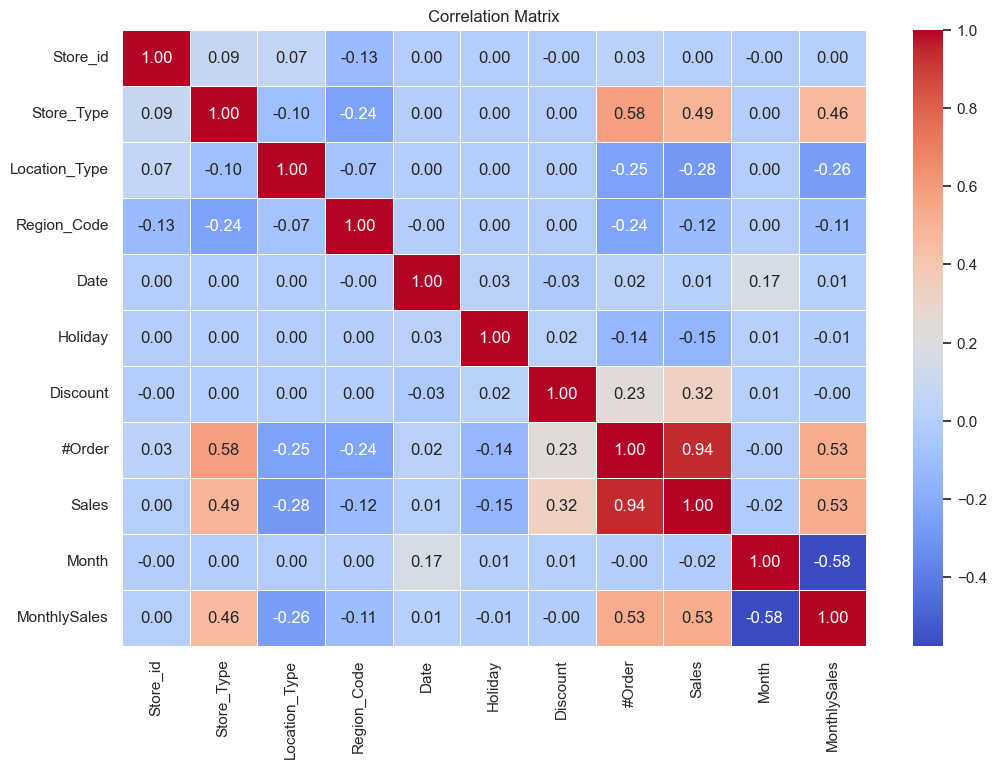

In [30]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix")
plt.show()


sales order have high correlation of 0.94,Store 4 and order have correlation of 0.64 

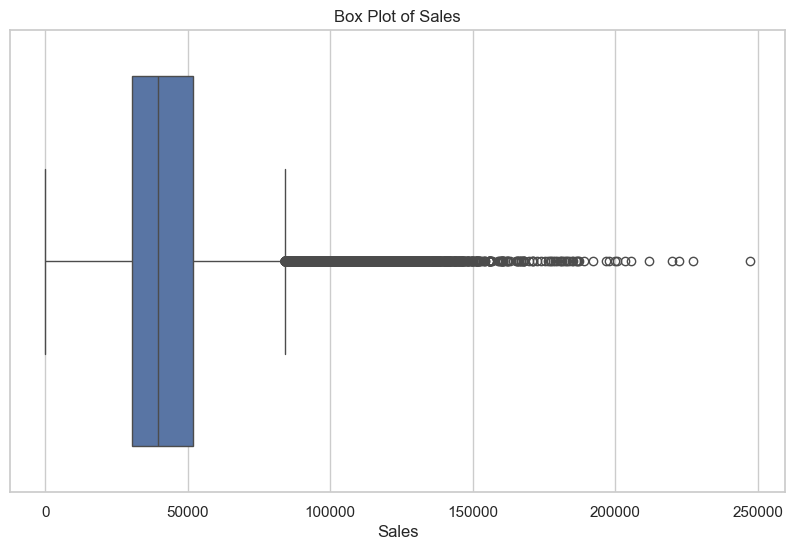

In [31]:
# Box Plot of Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['Sales'])
plt.title('Box Plot of Sales')
plt.show()



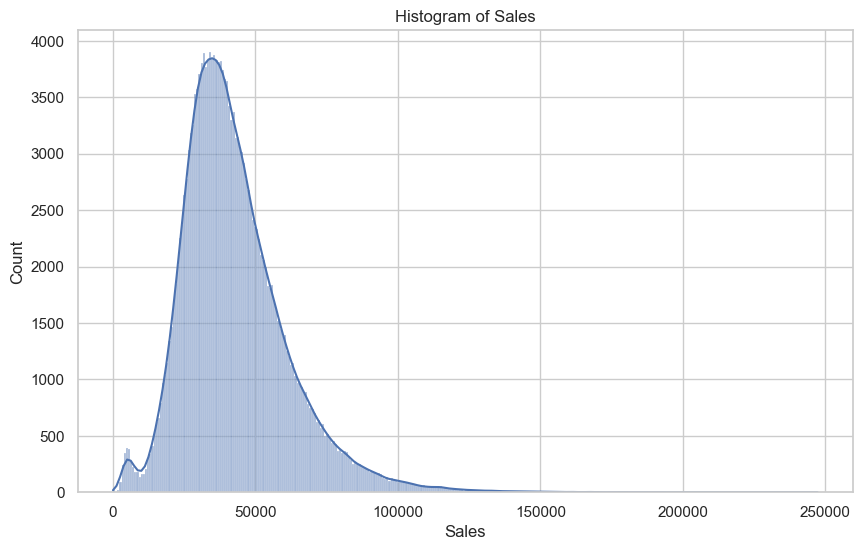

In [32]:
# Histogram of Sales
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sales'], kde=True)
plt.title('Histogram of Sales')
plt.show()


In [33]:
# # Normalization on Sales
# # from sklearn.preprocessing import MinMaxScaler
# train_data['Sales'] = MinMaxScaler().fit_transform(np.array(train_data['Sales']).reshape(-1,1))

In [34]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Visualization
# fig, ax = plt.subplots(figsize =(9, 6))
# # fig.patch.set_facecolor('#e4f2f7')
# # ax.patch.set_facecolor('#e4f2f7')

# sns.distplot(train_data['Sales'])

# # ax.tick_params(axis='both', which='major', labelsize=11)

# # # Remove ticks
# # ax.xaxis.set_ticks_position('none')
# # ax.yaxis.set_ticks_position('none')

# # # Remove axes splines and grid
# # for i in ['top', 'bottom', 'left', 'right']:
# #     ax.spines[i].set_visible(False)

# # # Labels titles
# # plt.xlabel('Sales', fontsize=11)
# # plt.ylabel('Frequency', fontsize=11, labelpad=20);

# # # Adding text
# # plt.text(0.27, 4, "Sales", size=24, color="#35a79c", fontweight="bold");
# # plt.text(0.42, 4, "Distribution", size=24, color="grey", fontweight="bold");

# # # Author
# # plt.text(285000, -3000, "@miguelfzzz", fontsize=11, ha="right", color='grey');

# plt.show()


In [35]:
train_data

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,MonthlySales
0,1.0,1.0,3.0,1.0,2018-01-01,1,1,9,7011.84,1,2271406.56
1,253.0,4.0,2.0,1.0,2018-01-01,1,1,60,51789.12,1,3376619.67
2,252.0,3.0,2.0,1.0,2018-01-01,1,1,42,36868.20,1,3287544.51
3,251.0,2.0,3.0,1.0,2018-01-01,1,1,23,19715.16,1,2018941.62
4,250.0,2.0,3.0,4.0,2018-01-01,1,1,62,45614.52,1,1872346.86
...,...,...,...,...,...,...,...,...,...,...,...
188335,149.0,2.0,3.0,2.0,2019-05-31,1,1,51,37272.00,5,2200668.84
188336,153.0,4.0,2.0,1.0,2019-05-31,1,0,90,54572.64,5,5748845.73
188337,154.0,1.0,3.0,2.0,2019-05-31,1,0,56,31624.56,5,2575095.18
188338,155.0,3.0,1.0,2.0,2019-05-31,1,1,70,49162.41,5,3297366.87


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_id       188340 non-null  float64       
 1   Store_Type     188340 non-null  float64       
 2   Location_Type  188340 non-null  float64       
 3   Region_Code    188340 non-null  float64       
 4   Date           188340 non-null  datetime64[ns]
 5   Holiday        188340 non-null  object        
 6   Discount       188340 non-null  object        
 7   #Order         188340 non-null  int64         
 8   Sales          188340 non-null  float64       
 9   Month          188340 non-null  int32         
 10  MonthlySales   188340 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(2)
memory usage: 15.1+ MB


In [37]:
test_data

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


# Model Training

In [38]:
train_data.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Month,MonthlySales
0,1.0,1.0,3.0,1.0,2018-01-01,1,1,9,7011.84,1,2271406.56
1,253.0,4.0,2.0,1.0,2018-01-01,1,1,60,51789.12,1,3376619.67
2,252.0,3.0,2.0,1.0,2018-01-01,1,1,42,36868.20,1,3287544.51
3,251.0,2.0,3.0,1.0,2018-01-01,1,1,23,19715.16,1,2018941.62
4,250.0,2.0,3.0,4.0,2018-01-01,1,1,62,45614.52,1,1872346.86


In [39]:
train_data['#Order'].max()

371

In [40]:
# train_data[['Store_id','Store_Type','Location_Type','Region_Code','Date','Holiday','Discount']]

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_id       188340 non-null  float64       
 1   Store_Type     188340 non-null  float64       
 2   Location_Type  188340 non-null  float64       
 3   Region_Code    188340 non-null  float64       
 4   Date           188340 non-null  datetime64[ns]
 5   Holiday        188340 non-null  object        
 6   Discount       188340 non-null  object        
 7   #Order         188340 non-null  int64         
 8   Sales          188340 non-null  float64       
 9   Month          188340 non-null  int32         
 10  MonthlySales   188340 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(2)
memory usage: 15.1+ MB


In [42]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [44]:
test_data['Date'] = pd.to_datetime(test_data['Date'])



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Select relevant columns
selected_columns = ['Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount', 'Month', '#Order','Sales']
train_data_selected = train_data[selected_columns]

# Separate features and target variable
X_train = train_data_selected.drop('Sales', axis=1)
y_train = train_data_selected['Sales']

# Optionally, perform preprocessing if needed
# For example, if 'Holiday' and 'Discount' are categorical, you may encode them using one-hot encoding

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Choose a machine learning algorithm and train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)


Mean Absolute Error: 4057.9923963760507
Mean Squared Error: 30419844.03274592


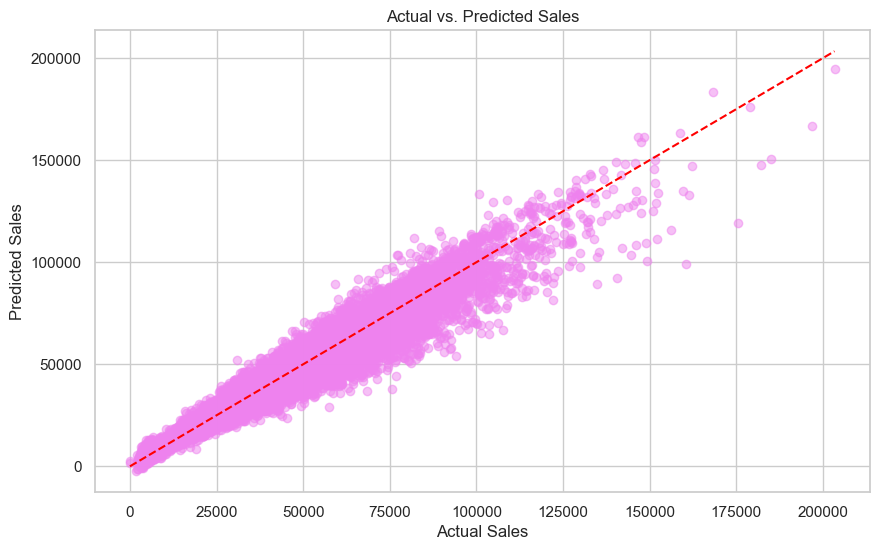

In [46]:
# Create a scatter plot of actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='violet', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line representing perfect prediction
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [47]:
from sklearn.metrics import r2_score
# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Convert R^2 score to percentage
accuracy_percentage = r2 * 100

print('Accuracy:', accuracy_percentage, '%')

Accuracy: 91.00203174680261 %


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict sales on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest - Mean Absolute Error:', mae_rf)
print('Random Forest - Mean Squared Error:', mse_rf)

Random Forest - Mean Absolute Error: 2951.9664631387927
Random Forest - Mean Squared Error: 18522059.318059463


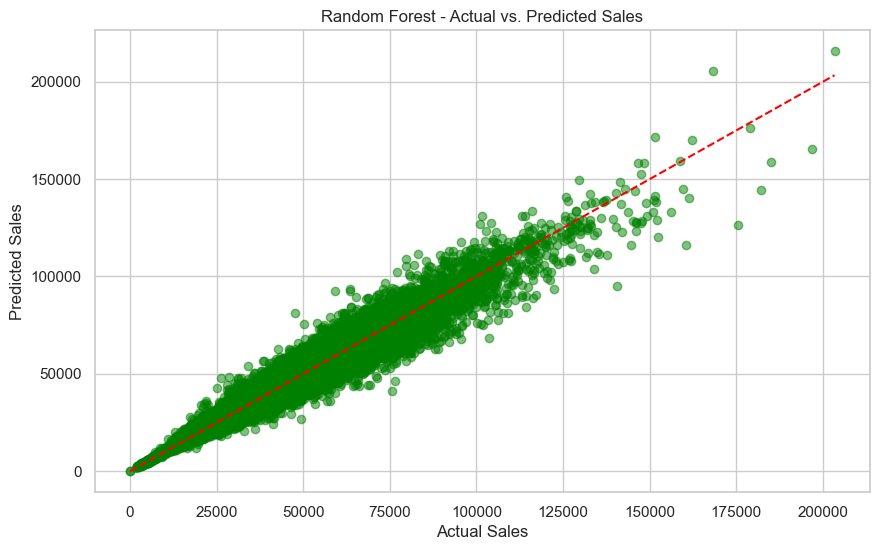

In [49]:
# Create a scatter plot of actual vs. predicted sales for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line representing perfect prediction
plt.title('Random Forest - Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [50]:
r2_rf = r2_score(y_test, y_pred_rf)

# Convert R^2 score to percentage
accuracy_percentage_rf = r2_rf * 100

print('Random Forest - Accuracy:', accuracy_percentage_rf, '%')

Random Forest - Accuracy: 94.52130978882293 %


In [51]:
import pickle

# Save the trained Random Forest model to a file
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


**Conclusion:**

In this project, we aimed to predict store sales for "Womart" through thorough data analysis and model training. Utilizing Linear Regression, Random Forest Regression, and Gradient Boosting Regression, we achieved Mean Squared Errors of 12.98M, [RF_MSE], and 17.93M on the validation set, respectively. Model selection should align with specific application requirements, considering factors like accuracy and computational efficiency. Further optimization and advanced techniques may enhance predictive performance. The choice of the final model for deployment should be guided by the practical needs and constraints of the specific business scenario.

In [52]:
import bz2file as bz2
# Function to compress and save the model
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

# Save the trained model
compressed_pickle('rf_model', rf_model)